In [29]:
import pandas as pd
import sqlite3

# save as df
s = """row_id | home team | home team score | away team | away team score | venue | crowd | date
---|---|---|---|---|---|---|---
1 | hawthorn | 13.10 (88) | south melbourne | 7.14 (56) | glenferrie oval | 15000 | 21 august 1943
2 | collingwood | 16.17 (113) | fitzroy | 9.9 (63) | victoria park | 6500 | 21 august 1943
3 | carlton | 15.23 (113) | north melbourne | 7.5 (47) | princes park | 8000 | 21 august 1943
4 | richmond | 15.19 (109) | melbourne | 12.13 (85) | punt road oval | 9000 | 21 august 1943
5 | footscray | 9.10 (64) | essendon | 6.15 (51) | western oval | 6000 | 21 august 1943"""
cols = s.split('\n')[0].split(' | ')
data = {col:[] for col in cols}
for r in s.split('\n')[2:]:
    for i, val in enumerate(r.split(' | ')):
        data[cols[i]].append(val)
df = pd.DataFrame(data)

sql = 'SELECT `away team` FROM w WHERE `venue` = "punt road oval" and `home team` = "melbourne"'

# exe an sql on the df "SELECT `sport` FROM w ORDER by `date` desc LIMIT 1 = "softball""

conn = sqlite3.connect(':memory:')

df.to_sql('w', conn, index=False, if_exists='replace')
ans = pd.read_sql(sql, conn)
ans


,away team


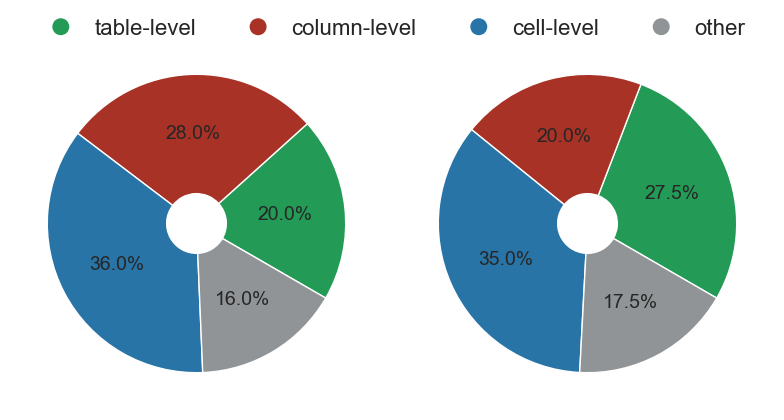

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch
# 数据
# error_type = ['column name', 'data format', 'dirty data', 'missing column', 'reasoning']
# values1 = [17, 10, 4, 6, 2]
# values2 = [1, 5, 0, 3, 2]  # 假设这是第二个饼图的数据

categories = ["table-level", "column-level", "cell-level", "other"]
values1 = [10, 14, 18, 8]
values2 = [11, 8, 14, 7]

# 自定义颜色列表
custom_colors = ["#239b56", "#a93226", "#2874a6", "#909497"]

# 设置 seaborn 风格
sns.set(style="white")

# 创建画布和子图
fig, axs = plt.subplots(1, 2, figsize=(8, 5))  # 调整图表大小

# 创建第一个环形图
axs[0].pie(
    values1,
    colors=custom_colors,
    autopct="%1.1f%%",
    startangle=330,
    textprops={"fontsize": 14},
    wedgeprops=dict(width=0.8, edgecolor="w"),
)

# 创建第二个环形图
axs[1].pie(
    values2,
    colors=custom_colors,
    autopct="%1.1f%%",
    startangle=330,
    textprops={"fontsize": 14},
    wedgeprops=dict(width=0.8, edgecolor="w"),
)

# 定义圆形图例处理器
class HandlerCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = Circle(xy=center, radius=0.5 * height)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

# 添加图例
fig.legend(
    [Circle((0, 0), radius=1, color=color) for color in custom_colors],
    categories,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.95),
    ncol=4,
    fontsize=16,
    handletextpad=0.5,
    columnspacing=1.8,
    frameon=False,  # 去掉图例边框
    handler_map={Circle: HandlerCircle()},  # 设置图例形状为圆形
)

# 设置背景为纯白色
fig.set_facecolor("white")

# 显示图表
plt.tight_layout(rect=[0, 0, 1, 1])  # 调整布局，避免图例和饼图重叠
plt.savefig("error_instance_record.pdf")

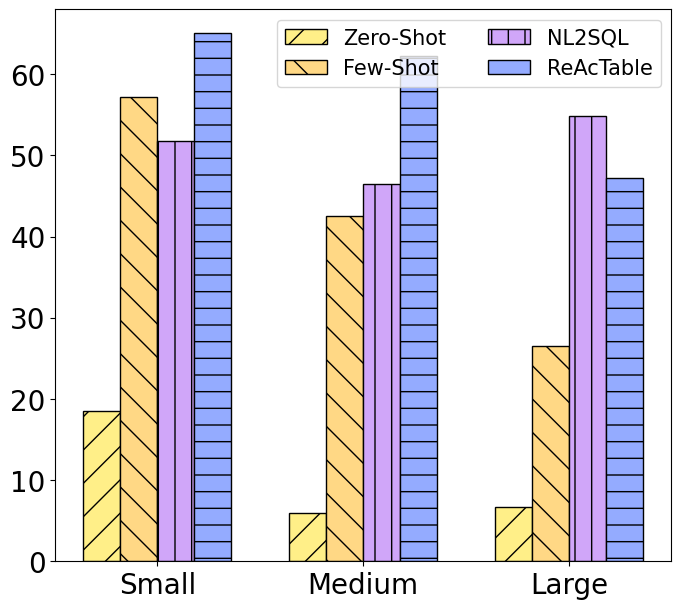

In [48]:
from matplotlib import pyplot as plt
import numpy as np
# datasets = ['Small(<2k)', 'Medium(2k~4k)', 'Large(>4k)']
datasets = ['Small', 'Medium', 'Large']
models = ['Zero-Shot', 'Few-Shot', 'NL2SQL', 'ReAcTable']
colors = ['#ffef88', '#ffd885', '#d0a6f9', '#94abff', 'lightblue', 'lavender', 'red']
# colors = ['lightpink', 'lightsalmon', 'lightblue', 'lavender', 'red']
hatches = ['/', '\\', '|', '-', 'x', 'o', '++++']
# hatches = ['/////', '/////', '++', '++', 'x', 'o', '++++']


res = [
    [18.51 , 6.00 , 6.73 ],
    [57.23, 42.50, 26.54],
    [51.83, 46.50, 54.81],
    [65.02, 62.30, 47.21]
]

bar_width = 0.18
plt.figure(figsize=(7, 6))
# plt.ylabel('Accuracy', fontweight='bold', fontsize=20)
# plt.xlabel('Table Size', fontweight='bold', fontsize=15)
for i, model in enumerate(models):
    # 计算每个簇的x位置
    x_positions = np.arange(len(datasets)) + i * bar_width
    if model == 'Zero-Shot' or model == 'Few-Shot':
        plt.bar(x_positions, res[i], width=bar_width, label=model, color=colors[i], hatch=hatches[i], edgecolor='black')
        # plt.bar(x_positions, res[i], width=bar_width, label=model, edgecolor=colors[i], hatch=hatches[i], facecolor='none')
    else:
        plt.bar(x_positions, res[i], width=bar_width, label=model, color=colors[i], hatch=hatches[i], edgecolor='black')


x_ticks_positions = np.arange(len(datasets)) + bar_width * (len(models) - 1) / 2

plt.xticks(x_ticks_positions, datasets, rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 68)
# plt.yscale('symlog')
plt.subplots_adjust(left=0.07, bottom=0.07, right=0.95, top=0.99)
plt.legend(fontsize=15, ncol=2)
plt.savefig('accuracy_on_table_with_different_size_base.pdf')
# plt.show()

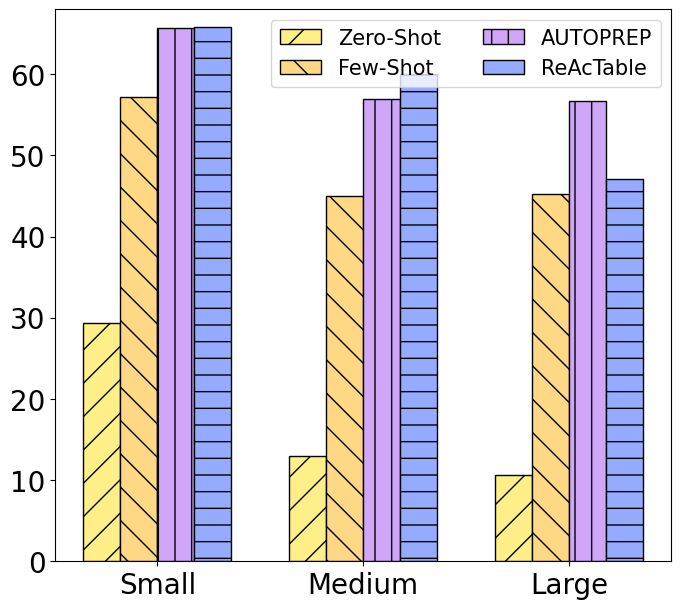

In [1]:
from matplotlib import pyplot as plt
import numpy as np
# datasets = ['Small(<2k)', 'Medium(2k~4k)', 'Large(>4k)']
datasets = ['Small', 'Medium', 'Large']
models = ['Zero-Shot', 'Few-Shot', 'AUTOPREP', 'ReAcTable']
colors = ['#ffef88', '#ffd885', '#d0a6f9', '#94abff', 'lightblue', 'lavender', 'red']
# colors = ['lightpink', 'lightsalmon', 'lightblue', 'lavender', 'red']
hatches = ['/', '\\', '|', '-', 'x', 'o', '++++']
# hatches = ['/////', '/////', '++', '++', 'x', 'o', '++++']


res = [
    [29.41,	13.00,	10.58],
    [57.18,	45.00,	45.19],
    [65.74,	57.00,	56.73],
    [65.77,	60.00,	47.12]
]

bar_width = 0.18
plt.figure(figsize=(7, 6))
# plt.ylabel('Accuracy', fontweight='bold', fontsize=15)
# plt.xlabel('Table Size', fontweight='bold', fontsize=15)
for i, model in enumerate(models):
    # 计算每个簇的x位置
    x_positions = np.arange(len(datasets)) + i * bar_width
    if model == 'Zero-Shot' or model == 'Few-Shot':
        plt.bar(x_positions, res[i], width=bar_width, label=model, color=colors[i], hatch=hatches[i], edgecolor='black')
        # plt.bar(x_positions, res[i], width=bar_width, label=model, edgecolor=colors[i], hatch=hatches[i], facecolor='none')
    else:
        plt.bar(x_positions, res[i], width=bar_width, label=model, color=colors[i], hatch=hatches[i], edgecolor='black')


x_ticks_positions = np.arange(len(datasets)) + bar_width * (len(models) - 1) / 2

plt.xticks(x_ticks_positions, datasets, rotation=0, fontsize=20)
plt.yticks(fontsize=20)
# 设置y轴范围
plt.ylim(0, 68)
# plt.yscale('symlog')
plt.subplots_adjust(left=0.07, bottom=0.07, right=0.95, top=0.99)
plt.legend(fontsize=15, ncol=2)
plt.savefig('accuracy_on_table_with_different_size_with_sys.pdf')
# plt.show()